In [12]:
import json
  
# Opening JSON file
f = open('data.json')
  
# Returns JSON object as a dictionary
data = json.load(f)

In [13]:
# Iterating through the json list
for event in data['events']:
    print(event)
  
# Closing file
#f.close()

{'objects': [{'objectType': 'Node', 'objectName': 'NodeA'}, {'objectType': 'Pod', 'objectName': 'PodA'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}], 'start': '2022-07-07 12:00:00', 'finish': '2022-07-07 12:00:01', 'eventType': '', 'eventName': 'Create'}
{'objects': [{'objectType': 'Node', 'objectName': 'NodeA'}, {'objectType': 'Pod', 'objectName': 'PodA'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}], 'start': '2022-07-07 12:05', 'finish': '2022-07-07 12:06', 'eventType': '', 'eventName': 'Attach'}
{'objects': [{'objectType': 'Node', 'objectName': 'NodeA'}, {'objectType': 'Pod', 'objectName': 'PodA'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}], 'start': '2022-07-07 12:06', 'finish': '2022-07-07 12:07', 'eventType': '', 'eventName': 'Mount'}
{'objects': [{'objectType': 'Node', 'objectName': 'NodeB'}, {'objectType': 'Pod', 'objectName': 'PodB'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}], 'start': '2022-07-07 12:06', 'finish': '2022-07-07 12:07', 'eventType'

In [14]:
class Events:
    def __init__(self, node, start, finish, eventName, eventType, eventObject):
        self.node = node
        self.start = start
        self.finish = finish
        self.eventName=eventName
        self.eventType=eventType
        self.eventObject=eventObject
    def __init__(self):
        self.node = ""
        self.start = ""
        self.finish = ""
        self.eventName= ""
        self.eventType= ""
        self.eventObject= ""
    def to_dict(self):
        return {
            'node': self.node,
            'start': self.start,
            'finish': self.finish,
            'eventName': self.eventName,
            'eventType': self.eventType,
            'eventObject': self.eventObject
        }

In [15]:
# Debugging Logs
for events in data['events']:
    #print(obj)
    print(events['objects'])
    print(events['start'])
    print(events['finish'])
    print(events['eventName'])
    print(events['eventType'])
    
    objects = events['objects']

    for obj in objects:
        #print(obj)
        print(obj['objectType'])
        print(obj['objectName'])
    print("-----------------------")

[{'objectType': 'Node', 'objectName': 'NodeA'}, {'objectType': 'Pod', 'objectName': 'PodA'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}]
2022-07-07 12:00:00
2022-07-07 12:00:01
Create

Node
NodeA
Pod
PodA
Volume
VolumeA
-----------------------
[{'objectType': 'Node', 'objectName': 'NodeA'}, {'objectType': 'Pod', 'objectName': 'PodA'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}]
2022-07-07 12:05
2022-07-07 12:06
Attach

Node
NodeA
Pod
PodA
Volume
VolumeA
-----------------------
[{'objectType': 'Node', 'objectName': 'NodeA'}, {'objectType': 'Pod', 'objectName': 'PodA'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}]
2022-07-07 12:06
2022-07-07 12:07
Mount

Node
NodeA
Pod
PodA
Volume
VolumeA
-----------------------
[{'objectType': 'Node', 'objectName': 'NodeB'}, {'objectType': 'Pod', 'objectName': 'PodB'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}]
2022-07-07 12:06
2022-07-07 12:07
Mount

Node
NodeB
Pod
PodB
Volume
VolumeA
-----------------------
[{'objectType': 

In [16]:
# Create an event list to be used as dataframe
eventList = []
for events in data['events']:
    e = Events()
    e.start=events['start']
    e.finish=events['finish']
    e.eventName=events['eventName']
    e.eventType=events['eventType']
    
    objects = events['objects']
    #objectList = []
    objectString = ""
    for obj in objects:
        # Update node type to separate graphs
        if obj['objectType'] == "Node":
            e.node = obj['objectName']
        else:
            #objectList.append(obj['objectType'] + ":" + obj['objectName'])
            objectString +=  " " + obj['objectType'] + ":" + obj['objectName']
    e.eventObject =  objectString       
    eventList.append(e.to_dict())
    
    

print(eventList)

[{'node': 'NodeA', 'start': '2022-07-07 12:00:00', 'finish': '2022-07-07 12:00:01', 'eventName': 'Create', 'eventType': '', 'eventObject': ' Pod:PodA Volume:VolumeA'}, {'node': 'NodeA', 'start': '2022-07-07 12:05', 'finish': '2022-07-07 12:06', 'eventName': 'Attach', 'eventType': '', 'eventObject': ' Pod:PodA Volume:VolumeA'}, {'node': 'NodeA', 'start': '2022-07-07 12:06', 'finish': '2022-07-07 12:07', 'eventName': 'Mount', 'eventType': '', 'eventObject': ' Pod:PodA Volume:VolumeA'}, {'node': 'NodeB', 'start': '2022-07-07 12:06', 'finish': '2022-07-07 12:07', 'eventName': 'Mount', 'eventType': '', 'eventObject': ' Pod:PodB Volume:VolumeA'}, {'node': 'NodeA', 'start': '2022-07-07 12:06', 'finish': '2022-07-07 12:07', 'eventName': 'Creating', 'eventType': '', 'eventObject': ' Portworx:Portworx'}, {'node': 'NodeA', 'start': '2022-07-07 12:06', 'finish': '2022-07-07 12:07', 'eventName': 'Running', 'eventType': '', 'eventObject': ' Portworx:Portworx'}, {'node': 'NodeB', 'start': '2022-07-07

In [17]:
for e in eventList:
    print(e)
    
    

{'node': 'NodeA', 'start': '2022-07-07 12:00:00', 'finish': '2022-07-07 12:00:01', 'eventName': 'Create', 'eventType': '', 'eventObject': ' Pod:PodA Volume:VolumeA'}
{'node': 'NodeA', 'start': '2022-07-07 12:05', 'finish': '2022-07-07 12:06', 'eventName': 'Attach', 'eventType': '', 'eventObject': ' Pod:PodA Volume:VolumeA'}
{'node': 'NodeA', 'start': '2022-07-07 12:06', 'finish': '2022-07-07 12:07', 'eventName': 'Mount', 'eventType': '', 'eventObject': ' Pod:PodA Volume:VolumeA'}
{'node': 'NodeB', 'start': '2022-07-07 12:06', 'finish': '2022-07-07 12:07', 'eventName': 'Mount', 'eventType': '', 'eventObject': ' Pod:PodB Volume:VolumeA'}
{'node': 'NodeA', 'start': '2022-07-07 12:06', 'finish': '2022-07-07 12:07', 'eventName': 'Creating', 'eventType': '', 'eventObject': ' Portworx:Portworx'}
{'node': 'NodeA', 'start': '2022-07-07 12:06', 'finish': '2022-07-07 12:07', 'eventName': 'Running', 'eventType': '', 'eventObject': ' Portworx:Portworx'}
{'node': 'NodeB', 'start': '2022-07-07 12:06'

In [18]:
import pandas as pd
import plotly.graph_objs as go
df = pd.DataFrame(eventList)
df.head()

,node,start,finish,eventName,eventType,eventObject
0,NodeA,2022-07-07 12:00:00,2022-07-07 12:00:01,Create,,Pod:PodA Volume:VolumeA
1,NodeA,2022-07-07 12:05,2022-07-07 12:06,Attach,,Pod:PodA Volume:VolumeA
2,NodeA,2022-07-07 12:06,2022-07-07 12:07,Mount,,Pod:PodA Volume:VolumeA
3,NodeB,2022-07-07 12:06,2022-07-07 12:07,Mount,,Pod:PodB Volume:VolumeA
4,NodeA,2022-07-07 12:06,2022-07-07 12:07,Creating,,Portworx:Portworx


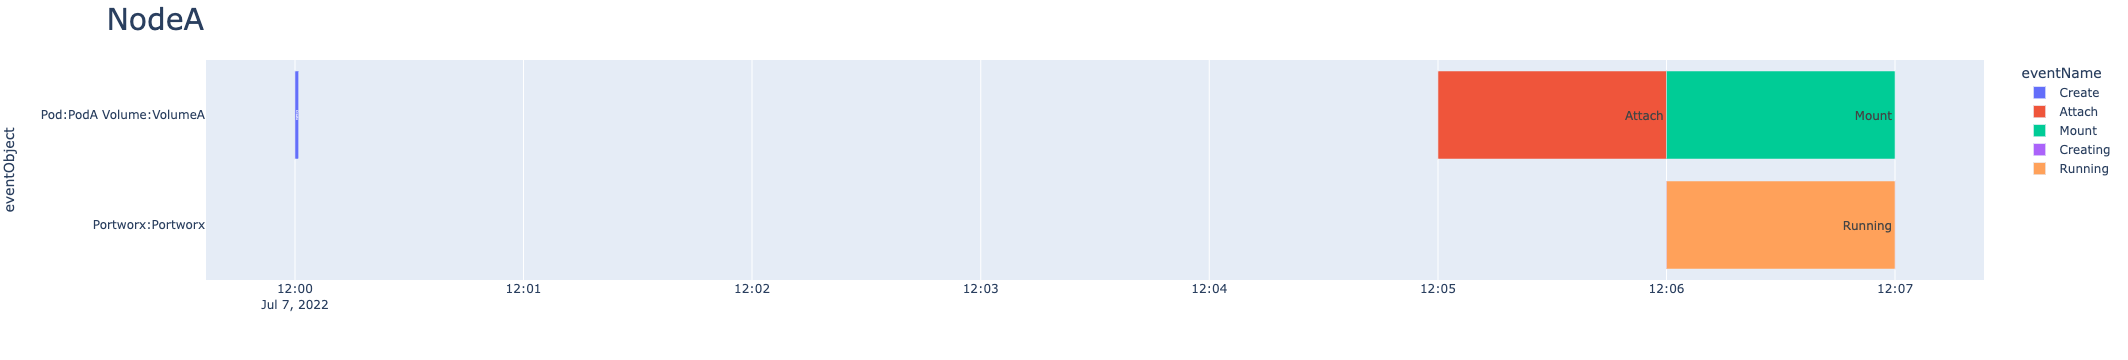

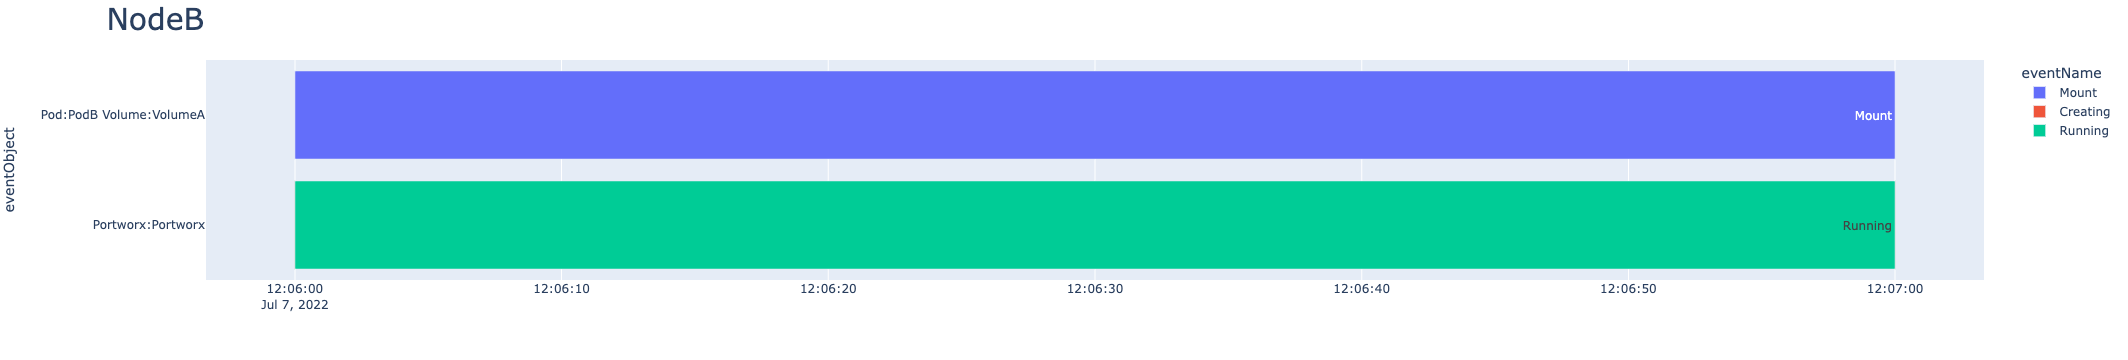

In [23]:
for name, group in df.groupby('node'):
    group.head()
    fig= px.timeline(group, x_start="start", x_end="finish", y="eventObject", color="eventName", text="eventName")
    fig.update_layout(title_text=name,
                  title_font_size=30)
    fig.update_xaxes(showgrid=True)

    fig.update_traces(textposition='inside')
    fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up

    fig.show()

In [21]:
f.close()